In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import plotly.io as pio
from plotly.colors import n_colors
from plotly.subplots import make_subplots



In [5]:
df=pd.read_csv("LS_2.0.csv")
df.head()


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [8]:
df.shape

(2263, 19)

In [9]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('\n','_')
df.rename(columns = {'over total electors _in constituency':'total_voters',
'over total votes polled _in constituency':'votes_polled',
'total electors':'total_electors'},inplace=True)


In [12]:
unique_parties = df['party'].unique()
print('The unique parties that contested in 2019 General Elections are:')
for party in unique_parties:
    print(party,end=",")


The unique parties that contested in 2019 General Elections are:
BJP,TRS,INC,NOTA,BSP,NCP,VBA,APoI,CPI(M),BDJS,AITC,RSP,SP,YSRCP,TDP,JnP,INLD,SBSP,IND,SHS,AAP,SAD,JKN,JKPDP,JPC,DMK,PMK,NTK,MNM,AIADMK,RJD,CPI(ML)(L),SSD,PPA,JD(S),NPEP,BMUP,BJD,AIMIM,HAMS,AHFBK,PPID,SPL,ASDC,RLD,PSPL,JD(U),BTP,AIFB,AGP,AIUDF,ABSKP,PUNEKP,RTORP,JNJP,LTSP,RVNP,JANADIP,SDPI,DMDK,ABGP,VCK,JMM,LIP,JDR,MOSP,MADP,AJPR,PMP,BBMP,AJSUP,JVM,RMPOI,LJP,BJKVP,SWP,NEINDP,RSPSR,ravp,RSOSP,BLSP,WPOI,SUCI(C),SJDD,ANC,JDL,VSIP,AAM,JKP,BOPF,UPPL,CPIM,GGP,KEC(M),KEC,JAPL,AKBMP,TJS,IUML,BSCP,ADAL,BRPI,MNF,PRISMP,VPI,YKP,NDPP,RLTP,RAHIS,NPF,BLSD,BVA,NAWPP,AINRC,BNDl,MSHP,BARESP,BLRP,AIPF,WAP,VCSMP,SAD(M),UDP,SKM,SDF,PDP,JHP,TMC(M),IPFT,JKNPP,DSSP,AHNP,PHJSP,

In [14]:
def value_cleaner(x):
    try:
        # Extract the part after 'Rs' and before the next newline, then strip whitespace
        str_temp = x.split('Rs')[1].split('\n')[0].strip()
        # Remove commas from the extracted string to make it a continuous number
        str_temp_2 = ''.join(str_temp.split(","))
        return str_temp_2
    except:
        return 0

# Apply the value_cleaner function to the 'assets' and 'liabilities' columns
df['assets'] = df['assets'].apply(value_cleaner)
df['liabilities'] = df['liabilities'].apply(value_cleaner)

# Display the first few rows of the DataFrame to check the results
df.head()



,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [15]:
df['education']=df['education'].str.replace('\n','')
df['party']=df['party'].str.replace('TRS','BRS')


In [16]:
df1=df[df['party']!='NOTA']
df1.isnull().sum()

state             0
constituency      0
name              0
winner            0
party             0
symbol            0
gender            0
criminal_cases    0
age               0
category          0
education         0
assets            0
liabilities       0
general_votes     0
postal_votes      0
total_votes       0
total_voters      0
votes_polled      0
total_electors    0
dtype: int64

In [17]:
india = {
    'NORTH INDIA': ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana', 'Uttarakhand', 'NCT OF Delhi', 'Chandigarh'],
    'CENTRAL INDIA': ['Uttar Pradesh', 'Madhya Pradesh', 'Chhattisgarh'],
    'WEST INDIA': ["Gujarat", "Rajasthan", "Maharashtra", "Goa", "Dadra & Nagar Haveli", "Daman & Diu"],
    'SOUTH INDIA': ['Karnataka', 'Andhra Pradesh', 'Telangana', 'Kerala', 'Tamil Nadu', 'Puducherry', 'Lakshadweep'],
    'EAST INDIA': ["Bihar", "Jharkhand", "West Bengal", "Odisha", "Andaman & Nicobar Islands"],
    'NORTH-EAST INDIA': ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']
}

In [19]:
df['REGION'] = df['state'].apply(lambda state: next(region for region, states in india.items() if state in states))

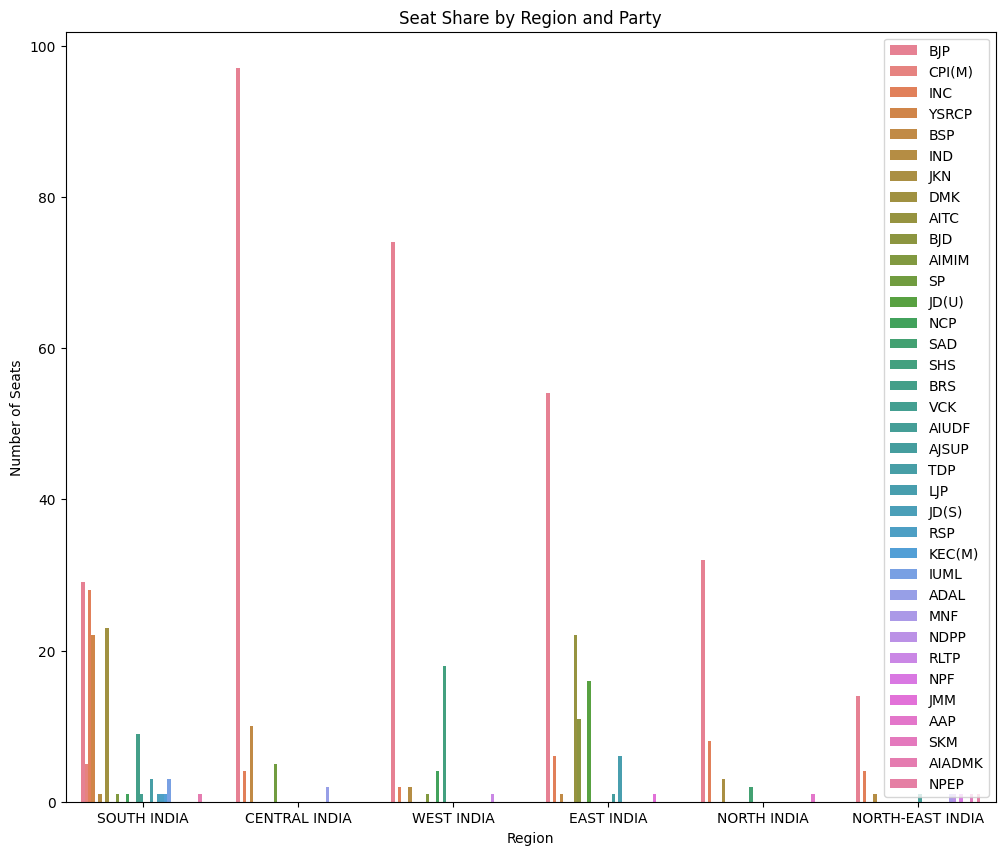

In [20]:
plt.figure(figsize=(12, 10))
sns.countplot(x='REGION', hue='party', data=df[df['winner'] == 1])
plt.title('Seat Share by Region and Party')
plt.xlabel('Region')
plt.ylabel('Number of Seats')
plt.legend()
plt.show()

In [23]:
df=df.fillna(0)
df['criminal_cases']=df['criminal_cases'].replace({'Not Available':0})
df['criminal_cases'] = pd.to_numeric(df['criminal_cases'],errors='coerce').astype(np.int64)
df['age']=df['age'].apply(lambda x:round(x))
def numer(i):
  df[i]=pd.to_numeric(df[i])

numer('assets')
numer('liabilities')
numer('age')


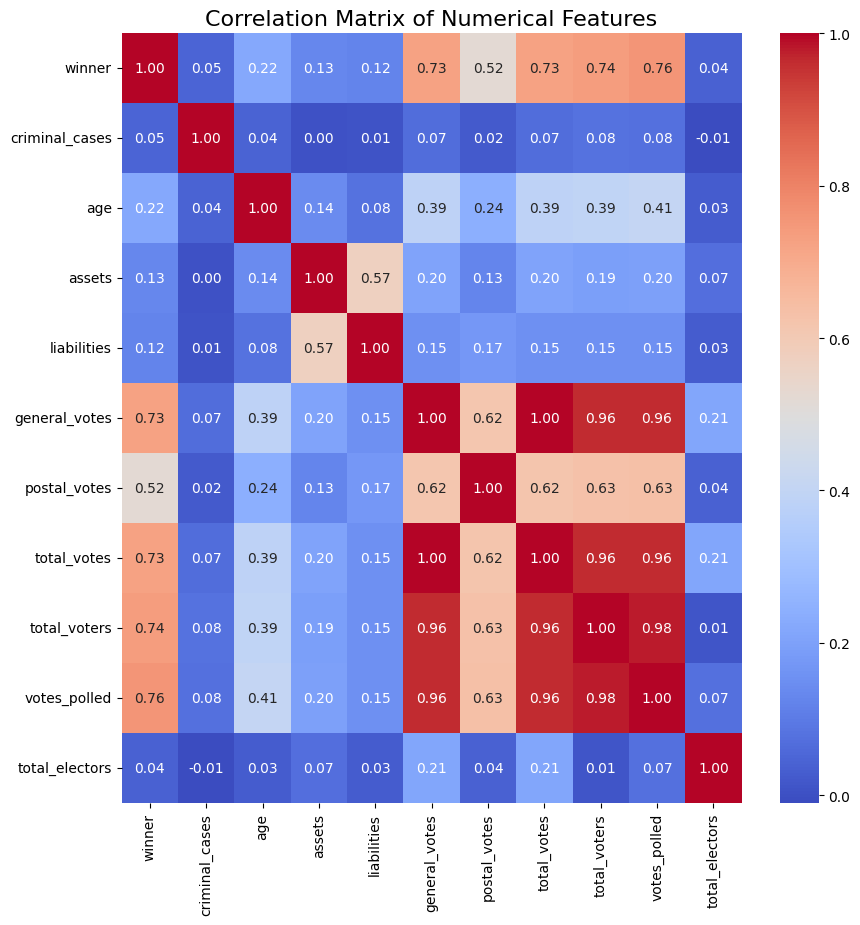

In [26]:
numerical_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# Customize the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

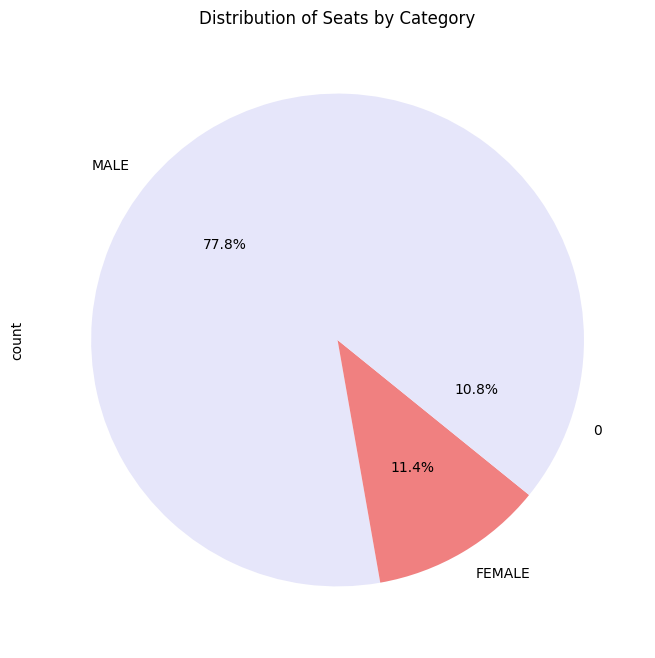

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

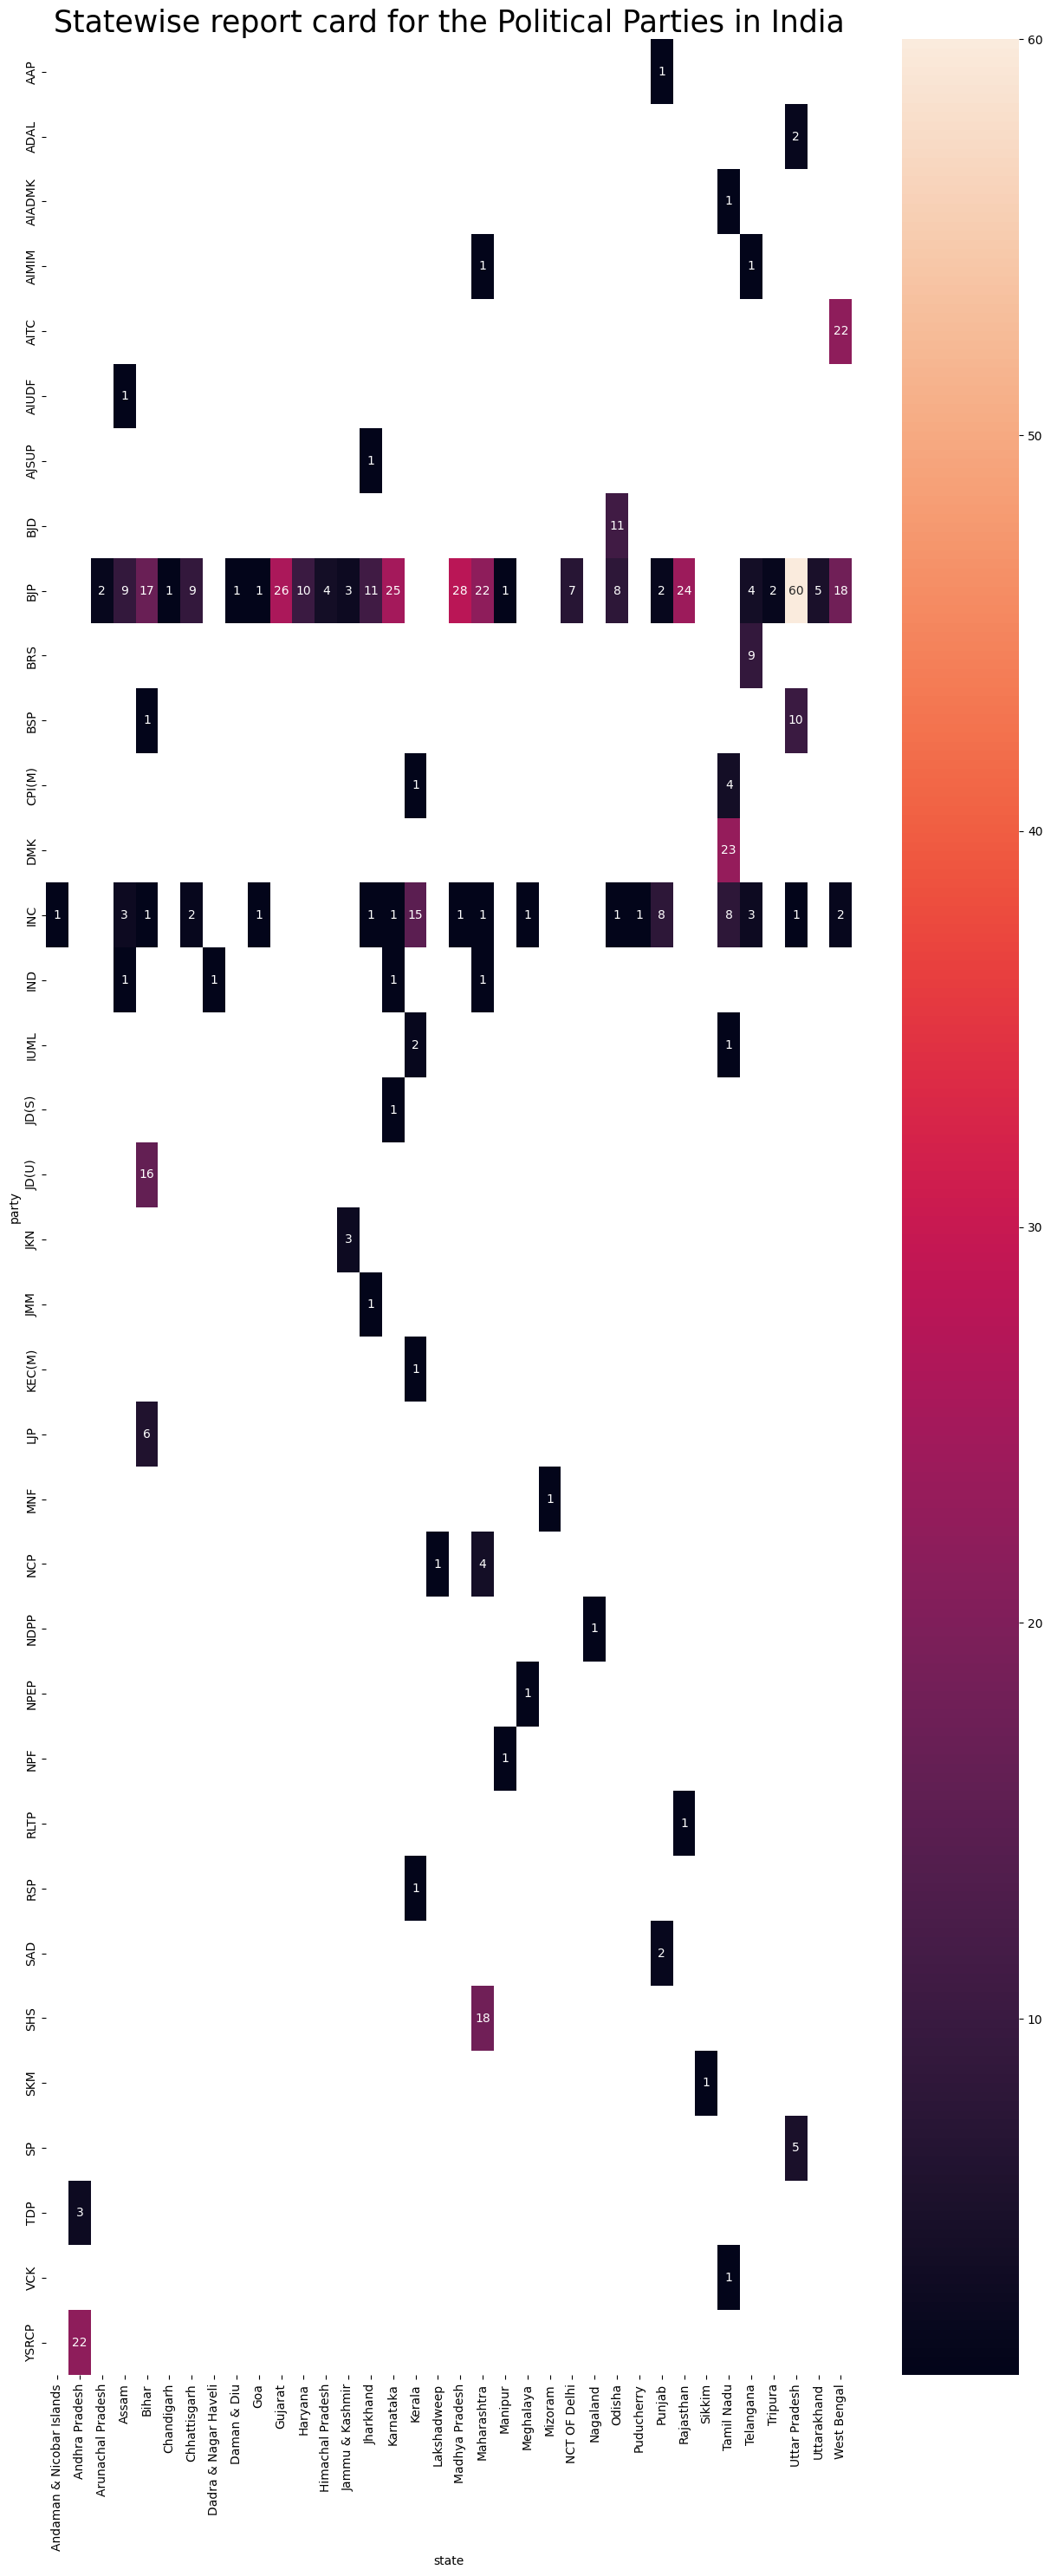

In [32]:

winners=df1[df1['winner']==1]
st_party=winners.groupby(['party','state'])['winner'].sum()\
.reset_index(name='wins')
pivot_st_party=pd.pivot(st_party,index='party',columns='state',values='wins')
plt.figure(figsize=(15,35))
sns.heatmap(pivot_st_party,annot=True,fmt="g")
plt.xlabel('state')
plt.ylabel('party')
plt.title('Statewise report card for the Political Parties in India',size=25)

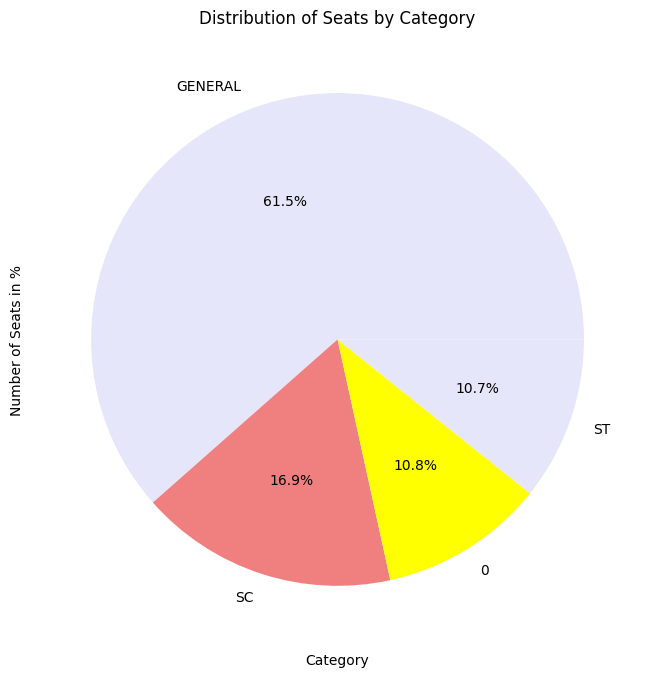

In [43]:
plt.figure(figsize=(10, 8))
df['category'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors=['lavender', 'lightcoral',"yellow"])
plt.title('Distribution of Seats by Category')
plt.xlabel('Category')
plt.ylabel('Number of Seats in %')
plt.show()


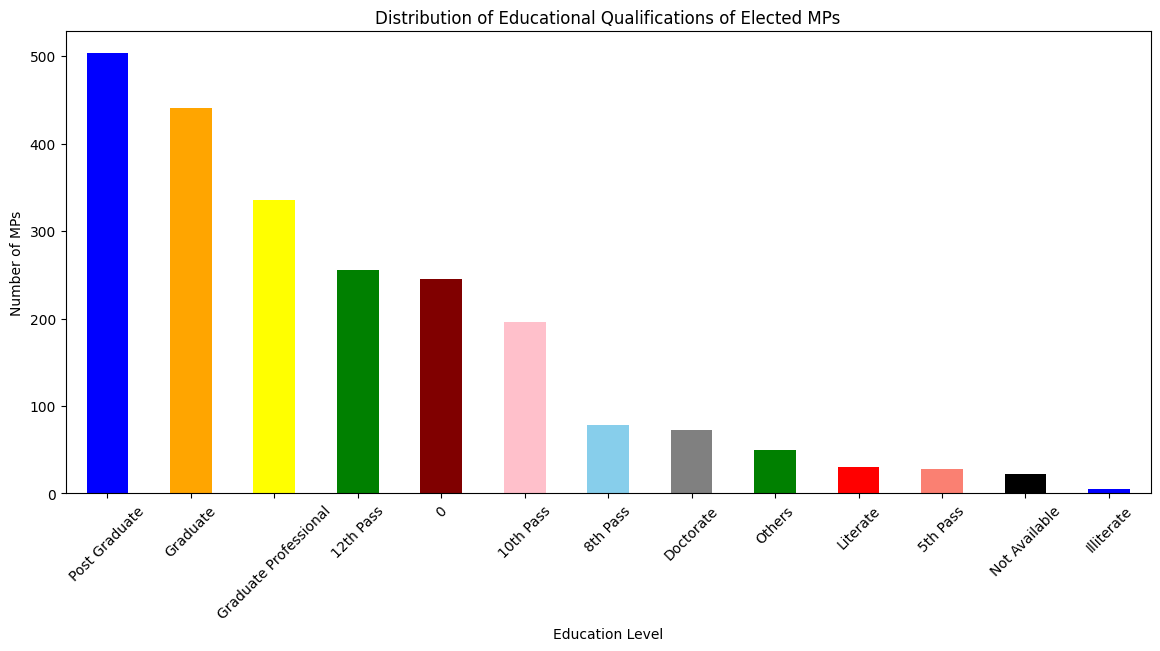

In [44]:
plt.figure(figsize=(14, 6))
df['education'].value_counts().plot(kind='bar',color=['Blue','Orange','Yellow','Green','Maroon','pink','skyblue','Gray','Green','red','salmon','black'])
plt.title('Distribution of Educational Qualifications of Elected MPs')
plt.xlabel('Education Level')
plt.ylabel('Number of MPs')
plt.xticks(rotation=45)
plt.show()

In [46]:
highest_turnout_states = df.groupby('state')['total_voters'].mean().sort_values(ascending=False).head()

In [47]:
print(highest_turnout_states)

state
Himachal Pradesh    28.064932
Lakshadweep         27.916795
Nagaland            27.453505
Karnataka           24.411552
Kerala              24.250340
Name: total_voters, dtype: float64


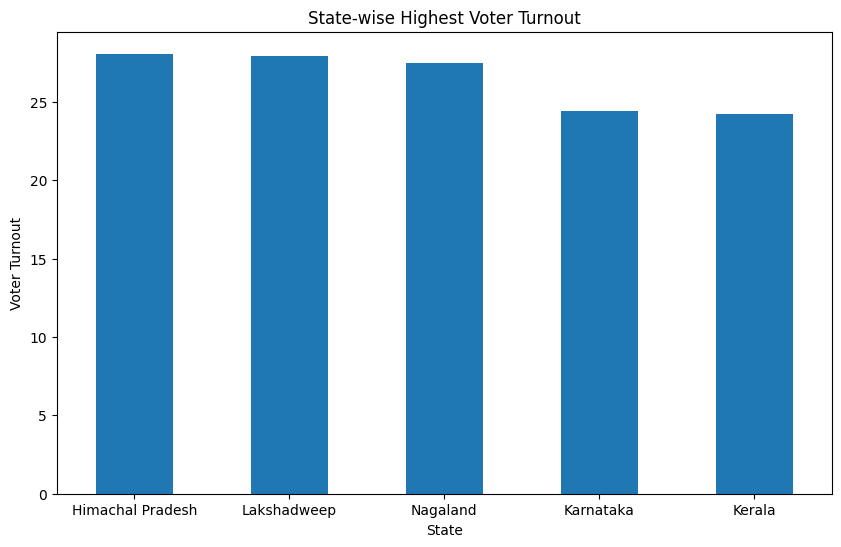

In [48]:
plt.figure(figsize=(10, 6))
highest_turnout_states.plot(kind="bar")
plt.title('State-wise Highest Voter Turnout')
plt.xlabel('State')
plt.ylabel('Voter Turnout')
plt.xticks(rotation=0)
plt.show()